# Newton's method for Root Finding 

We will start with Newton's method for root finding. That will enable us to quickly jump to Newton's method for optimization.

[Newton's method](https://en.wikipedia.org/wiki/Newton%27s_method) (also called the Newton-Raphson method) is an iterative numerical technique for finding roots of a real-valued function $f(x)$. The iterative formula is:
\begin{align} 
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)},
\end{align} 
where $f' = df/dx$, $x_n$ is the current approximation, and $x_{n+1}$ is the updated approximation. The iterative method requires an initial value, $x_0$.

To begin our study of Newton's method, let's consider the following function:
\begin{align} 
f(x) = 3x^3 + x - 1.
\end{align} 

What is the root of this function? The answer is $x\approx 0.68$ (see animation below).

The code below animates Newton's method for the above equation. In the animation, you will observe an iterative process in which an initial value converges to the root of the function.

In [1]:
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, Image
from IPython.display import HTML

from jax import jacobian, grad
import jax.numpy as jnp
from functools import partial 


In [2]:
# Function and derivative
f = lambda x: x**3 + x - 1
fx = lambda x: 3*x**2 + 1

xgrid = np.linspace(-4, 4, 100)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot()
ax.set_xlabel(r"$x$", size=20)
ax.set_ylabel(r"$f(x)$", size=20)
ax.plot(xgrid, f(xgrid))
ax.grid()

# Markers and lines for animation
m1 = r"$x_n$"
m2 = r"$x_{n+1}$"
dots, = ax.plot([], [], "o-", color="red", alpha=0.5)
d1, = ax.plot([], [], marker=m1, markersize=15, color="black", alpha=0.5)
d2, = ax.plot([], [], marker=m2, markersize=30, color="black", alpha=0.5)
ln, = ax.plot([], [], color="black", alpha=0.5)

# Text display for current x value
text = ax.text(0.05, 0.95, '', transform=ax.transAxes, 
               fontsize=14, verticalalignment='top')

x0 = -3
n_iter = 10

plt.close()

def init():
    dots.set_data([], [])
    d1.set_data([], [])
    d2.set_data([], [])
    ln.set_data([], [])
    text.set_text('')
    return dots, ln, d1, d2, text

def animate(i):
    global x0
    
    x1 = x0 - f(x0) / fx(x0)
    f0 = f(x0)
    
    dots.set_data([x0, x1], [f0, 0])
    ln.set_data([x0, x0], [0, f0])
    d1.set_data([x0], [0])
    d2.set_data([x1], [-5])  # y_offset for label
    
    text.set_text(f'$x = {x0:.3f}$')
    
    x0 = x1
    
    return dots, ln, d1, d2, text

interval = 600
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=n_iter, interval=interval, blit=True)

In [3]:
#anim.save("newton_method_root.mp4")

In [4]:
HTML(anim.to_html5_video())

**Derivation of Algorithm**

1) Consider the points $(x_n, f(x_n))$ and $(x_{n+1}, 0)$. Note that we want $f(x_{n+1})=0$. What is the slope of the line connecting these two points? 

The answer is the slope of the line connecting the two
\begin{equation} 
\text{slope}=\frac{0-f(x_n)}{x_{n+1}- x_n} = \frac{-f(x_n)}{x_{n+1}- x_n}.
\end{equation} 

2) What is the slope of the line tangent to $f(x)$ at $x_n$? 

The answer is the derivative $f'(x_n)$.

Newton's method approximates the function locally by its tangent line. Therefore, the slope of the line connecting $(x_n, f(x_n))$ and $(x_{n+1}, 0)$ should equal the slope of the tangent line at $x_n$, 

\begin{equation}
f'(x_n) = \frac{-f(x_n)}{x_{n+1}- x_n},
\end{equation}

Multiplying both sides by $(x_{n+1} - x_n)$, we have

\begin{equation}
f'(x_n)(x_{n+1} - x_n) = -f(x_n).
\end{equation}

Dividing by $f'(x_n)$ gives, 

\begin{equation}
x_{n+1} - x_n = \frac{-f(x_n)}{f'(x_n)}.
\end{equation}

We come to Newton's update formula 

\begin{equation}
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
\end{equation}



**Derivation via Taylor series**

**Derivation via Taylor Series**
We an also derive Newton's method via a Taylor series. The Taylor series expansion of $f(x)$ around a point $x_n$ is

\begin{equation}
f(x) = f(x_n) + f'(x_n)(x - x_n) + \frac{f''(x_n)}{2} (x - x_n)^2 + \dots.
\end{equation}

For a root-finding problem, we seek $x$ such that $f(x) = 0$. Truncating the Taylor series at linear order, we have

\begin{equation} 
0 \approx f(x_n) + f'(x_n) (x - x_n).
\end{equation}

Solving for $x$ gives

\begin{equation}
\begin{split} 
& f(x_n) = -f'(x_n)(x - x_n)\\
&x - x_n = -\frac{f(x_n)}{f'(x_n)}.
\end{split} 
\end{equation}

Therefore we have the Newton method update formula for root finding. 

\begin{equation}
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
\end{equation}

Newton's method, like any numerical technique is not perfect. A number of things can go wrong: 

- The solution is dependent on the initial guess
- The function can have multiple zeros, and therefore the located zero depends on the initial guess
- While not so much a "thing that can go wrong," Newton's method requires a derivative, which is sometimes difficult to obtain

**Problem 1**

Write your own Newton solver for a simple one-dimensional equation. Your solver is a function that has inputs: the function, the derivative of the function, the maximum number of iterations, and the tolerance. The last two parameters can be optional parameters. The function returns the root of the equation.

**Pseudocode for Newton's Method in One Dimension** 
```
Algorithm: Newton_Solver(f, df, x₀, max_iter, tol)

Input:  f         - function to find root of
        df        - derivative of f
        x₀        - initial guess
        max_iter  - maximum number of iterations
        tol       - convergence tolerance

Output: x - approximate root of f(x) = 0

1: for i = 0 to max_iter - 1 do
2:     delta ← f(x₀) / df(x₀)
3:     
4:     if |delta| < tol then
5:         return x₀ - delta
6:     end if
7:     
8:     x₀ ← x₀ - delta
9: end for
10:
11: print "Solution not found"
```

<details>
<summary>Solution</summary>
    
```python
import numpy as np

def newton_solver(f, df, x0, max_iter=20, tol=1e-5):
    '''
    Newton's method solver for finding roots of a function.
    
    Parameters
    ----------
    f : function
        The function for which we want to find the root
    df : function
        The derivative of f
    x0 : float
        Initial guess for the root
    max_iter : int, optional
        Maximum number of iterations (default: 20)
    tol : float, optional
        Convergence tolerance (default: 1e-5)
    
    Returns
    -------
    float
        Approximate root of f(x) = 0
        
    Notes
    -----
    The method iterates until |delta| < tol or max_iter is reached.
    If convergence is not achieved, a message is printed.
    '''
    # Iterate up to max_iter times
    for i in range(max_iter):
        
        # Compute the Newton step
        delta = f(x0) / df(x0)
    
        # Check for convergence
        if np.absolute(delta) < tol:
            return x0 - delta
        else: 
            # Update x0 for next iteration
            x0 = x0 - delta 
    
    # If we reach here, convergence was not achieved        
    if i == (max_iter - 1):
        print("Solution not found")
```

</details>

**Basins of Attraction** 

When a function has more than one zero, the value that Newton's method converges to depends on the initial guess. For example, the function $f(x)= x^2 - 1$ has two zeros, $x = \pm1$. For $x_0 > 0$, the solution converges to the zero at $x=1$. For $x_0 < 0$, the solution converges to the zero $x=-1$. The regions $(-\infty, 0)$ and $(0, \infty)$ are the Newton method basins of attraction for this particular problem. 

**Problem 2**

Write code to find the basins of attraction for $f(x) = x^3 - x$, which has three zeros at $x = \{-1, 0, 1\}$. Your code will utilize the `newton_solver` function you wrote above. Actually, I already did it for you, minus the `newton_solver` part. So, I guess you have to explain how my code works—provided you got the Newton solver code to work.

<details>
<summary>Solution</summary>
    
```python
# Define function and its derivative
f = lambda x: x**3 - x 
df = lambda x: 3*x**2 - 1

# Create array of initial guesses
x = np.linspace(-2, 2, 100) 

# Set up plot
ax = plt.subplot()
ax.plot(x, f(x))
ax.grid()

# Test each initial guess
for i in range(x.size): 
    
    # Run Newton's method from initial guess x[i]
    val = newton_solver(f, df, x[i], max_iter=100) 
    
    # Check which root Newton's method converged to and color accordingly
    if abs(val) < 1e-8:  # Converged to x = 0
        ax.plot([x[i]], [0], 's', markersize=3, color="blue")
        
    if abs(val - 1) < 1e-8:  # Converged to x = 1
        ax.plot([x[i]], [0], 's', markersize=3, color="red")
        
    if abs(val + 1) < 1e-8:  # Converged to x = -1
        ax.plot([x[i]], [0], 's', markersize=3, color="green")
```

**How the code works:**

The code visualizes the basins of attraction by testing 100 different initial guesses uniformly distributed between $-2$ and $2$. For each initial guess, Newton's method is run to find which root it converges to. The initial guess is then plotted on the $x$-axis with a colored marker:
- Blue for convergence to $x = 0$
- Red for convergence to $x = 1$  
- Green for convergence to $x = -1$

The resulting plot shows which initial values lead to which roots, revealing the basin structure of Newton's method for this function.

</details>

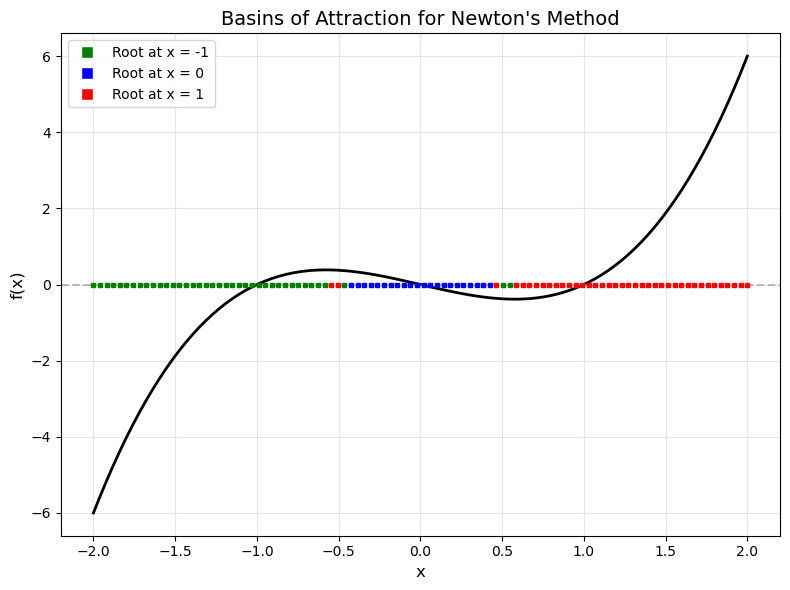

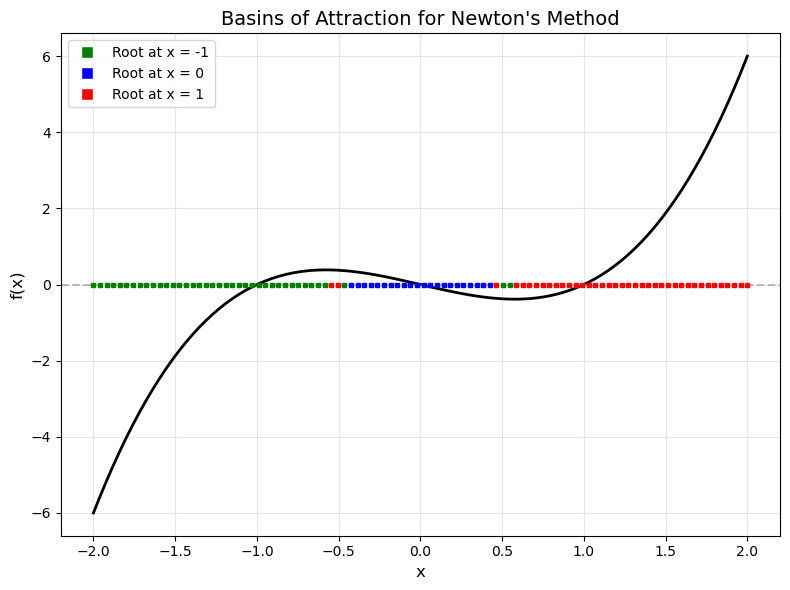

In [5]:
# Example usage:
f = lambda x: x**3 - x 
df = lambda x: 3*x**2 - 1

from newton import plot_basins_of_attraction

fig = plot_basins_of_attraction(f, df)

## Newton's method for systems of k equations 

Newton's method can be applied to a system of equations
\begin{align}
\mathbf{F} = \mathbf{F}(\mathbf{X}) 
\end{align} 
where $\mathbf{x} = (x_0,~ x_1,~ x_2,~ ...,~ x_k)^T$ and $\mathbf{F} = (F_0,~ F_1,~...,~F_k)^T $.

The algorithm is similar to the case before, 

\begin{align} 
\mathbf{x}_{n+1} =\mathbf{x}_n - J^{-1}(\mathbf{x}_n) \mathbf{F} (\mathbf{x}_n)
\end{align} 
where $J$ is the Jacobian matrix $J_{ij} = \frac{\partial F_i}{\partial x_j} $. 

In practice it is best not to invert the Jacobian but rather solve the system 
\begin{align} 
J(\mathbf{x}_n) \Delta \mathbf{x} = -F(\mathbf{x}_n)
\end{align} 
where $\Delta \mathbf{x} =\mathbf{x}_{n+1} - \mathbf{x}_n$. 

**Problem 3**

Show that Newton's method for a system of equations can be derived from a first-order Taylor series expansion. Specifically, expand $\mathbf{F}(\mathbf{x}_{n+1})$ about $\mathbf{x}_n$ and set it equal to $\mathbf{0}$ to derive the Newton update formula.

<details>
<summary>Solution</summary>

We begin with the first-order Taylor series expansion of $\mathbf{F}(\mathbf{x}_{n+1})$ about the point $\mathbf{x}_n$

\begin{equation}
\mathbf{F}(\mathbf{x}_{n+1}) \approx \mathbf{F}(\mathbf{x}_n) + J(\mathbf{x}_n)(\mathbf{x}_{n+1} - \mathbf{x}_n).
\end{equation}

where $J(\mathbf{x}_n)$ is the Jacobian matrix evaluated at $\mathbf{x}_n$.

Since we seek a root where $\mathbf{F}(\mathbf{x}_{n+1}) = \mathbf{0}$, we set the approximation to zero

\begin{equation}
\mathbf{0} \approx \mathbf{F}(\mathbf{x}_n) + J(\mathbf{x}_n)(\mathbf{x}_{n+1} - \mathbf{x}_n).
\end{equation}

Rearranging this equation gives

\begin{equation}
J(\mathbf{x}_n)(\mathbf{x}_{n+1} - \mathbf{x}_n) = -\mathbf{F}(\mathbf{x}_n).
\end{equation}

Let $\Delta \mathbf{x} = \mathbf{x}_{n+1} - \mathbf{x}_n$. Then we have

\begin{equation}
J(\mathbf{x}_n) \Delta \mathbf{x} = -\mathbf{F}(\mathbf{x}_n).
\end{equation}

Solving for $\Delta \mathbf{x}$ yields

\begin{equation}
\Delta \mathbf{x} = -J^{-1}(\mathbf{x}_n) \mathbf{F}(\mathbf{x}_n).
\end{equation}

Therefore, the Newton update formula is

\begin{equation}
\mathbf{x}_{n+1} = \mathbf{x}_n + \Delta \mathbf{x} = \mathbf{x}_n - J^{-1}(\mathbf{x}_n) \mathbf{F}(\mathbf{x}_n).
\end{equation}

This is the multidimensional generalization of Newton's method. In practice, we solve the linear system $J(\mathbf{x}_n) \Delta \mathbf{x} = -\mathbf{F}(\mathbf{x}_n)$ directly rather than computing the matrix inverse.

</details> 

**Pseudo code for Newton's Method for a system of equations**
```
Input: F (function), J (Jacobian), x_0 (initial guess), max_iter, tol

For i = 1 to max_iter:
    Evaluate F(x_0) and J(x_0)
    Solve J(x_0) * delta = -F(x_0) for delta
    
    If ||delta|| < tol:
        Return x_0 + delta (converged)
    
    Update: x_0 = x_0 + delta

If loop completes without convergence:
    Display "Failed to converge within max_iter iterations"
    Return x_0 (best estimate)
```

## Jacobians Are Not Difficult with Automatic Differentiation

[Automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) is a computational method for computing partial derivatives of functions. This is different from symbolic differentiation, like what you see in Mathematica. Automatic differentiation relies on the concept of dual numbers. Your instructor will give a brief explanation of dual numbers.

[JAX](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html) is a Python package that performs automatic differentiation. JAX was built for machine learning applications. Neural networks have many components, and the optimization methods for these networks require derivatives of all these components. Automatic differentiation provides great benefit to machine learning by efficiently computing these derivatives.

JAX also supports NumPy-like arrays. We typically import this as `import jax.numpy as jnp`. While `jax.numpy` and NumPy are similar, there are some small differences, so don't be surprised if you encounter an error.

Below are some examples of using automatic differentiation in JAX. Please see the JAX documentation for full details, as we don't have time to cover every aspect of JAX in this course.

**Note:** From here on, I am using `jax.numpy` instead of standard NumPy.

Example code is below.

In [6]:
# Gradient
f1 = lambda x: jnp.exp(10*x)
df1 = grad(f1) 
print(df1(0.0))

# Jacobian
def f2(x):
    x0, x1 = x
    return jnp.array([x0*x1, x0 + x1]) 

df2 = jacobian(f2)
print(f2(jnp.array([1., 2.])))
print(df2(jnp.array([1., 2.])))


10.0
[2. 3.]
[[2. 1.]
 [1. 1.]]


**Exercise 2**

Explore `jax.grad` and `jax.jacobian` with examples of your own making. Be sure you know what the result should be so you can build confidence that JAX works correctly. Hopefully you encounter an error or two—mistakes and confronting misconceptions are how you learn. Think of creative ways to use this functionality. Don't be afraid to experiment on your own.

**A note on Julia:** Julia is another high-level coding language (similar to Python) with an excellent automatic differentiation package. Personally, I prefer Julia's automatic differentiation over similar Python packages. I built an all-purpose implicit Runge-Kutta (IRK) solver in Julia and used the automatic differentiation library to compute Jacobians. I developed this IRK solver because I was interested in symplectic integration, which is a very interesting topic. We don't have the time or the mathematical background to fully cover symplectic integration in this course. However, if you're interested in Hamiltonian dynamics (which is always fascinating), then symplectic integration is worth exploring on your own.

**Example: Finding the Intersection of a Circle and a Line**

As a pedagogical example, we consider the problem of finding where the circle $x^2 + y^2 = 4$ intersects the line $y = x + 1$.

To apply Newton's method, we formulate this as a system of equations where we seek $(x, y)$ that simultaneously satisfy

\begin{equation}
\mathbf{F}(\mathbf{x}) = \begin{pmatrix} F_1(x,y) \\ F_2(x,y) \end{pmatrix} = \begin{pmatrix} x^2 + y^2 - 4 \\ y - x - 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}.
\end{equation}

The Jacobian matrix of this system of equations is

\begin{equation}
J(x,y) = \begin{pmatrix} 
\frac{\partial F_1}{\partial x} & \frac{\partial F_1}{\partial y} \\
\frac{\partial F_2}{\partial x} & \frac{\partial F_2}{\partial y}
\end{pmatrix} = \begin{pmatrix} 
2x & 2y \\
-1 & 1
\end{pmatrix}.
\end{equation}

This system has two solutions (the circle and line intersect at two points). The exact solutions are

\begin{equation}
(x_1, y_1) = \left(\frac{-1 + \sqrt{7}}{2}, \frac{1 + \sqrt{7}}{2}\right) \approx (0.823, 1.823)
\end{equation}

and

\begin{equation}
(x_2, y_2) = \left(\frac{-1 - \sqrt{7}}{2}, \frac{1 - \sqrt{7}}{2}\right) \approx (-1.823, -0.823).
\end{equation}

Newton's method will converge to one of these solutions depending on the initial guess.

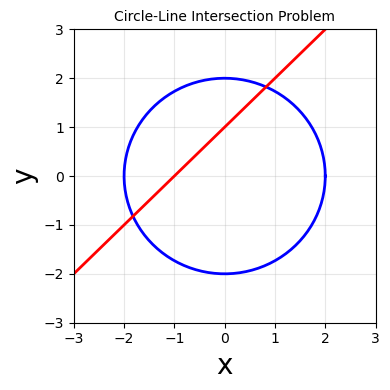

In [7]:
# Create figure
fig, ax = plt.subplots(figsize=(4, 4))

# Plot circle: x^2 + y^2 = 4
theta = np.linspace(0, 2*np.pi, 200)
x_circle = 2 * np.cos(theta)
y_circle = 2 * np.sin(theta)
ax.plot(x_circle, y_circle, 'b-', linewidth=2, label='Circle: $x^2 + y^2 = 4$')

# Plot line: y = x + 1
x_line = np.linspace(-3, 3, 100)
y_line = x_line + 1
ax.plot(x_line, y_line, 'r-', linewidth=2, label='Line: $y = x + 1$')

# Formatting
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_title('Circle-Line Intersection Problem', fontsize=10)
ax.grid(True, alpha=0.3)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

plt.tight_layout()

In [8]:
def circle_line_system(x):
    """
    System of equations for circle and line intersection.
    
    Circle: x^2 + y^2 = 4
    Line: y = x + 1
    
    Parameters
    ----------
    x : array_like
        Array [x, y]
    
    Returns
    -------
    F : ndarray
        Function values [F1, F2]
    """
    x_val, y_val = x
    F1 = x_val**2 + y_val**2 - 4
    F2 = y_val - x_val - 1
    return jnp.array([F1, F2])


def circle_line_jacobian(x):
    """
    Jacobian matrix for circle and line system.
    
    Parameters
    ----------
    x : array_like
        Array [x, y]
    
    Returns
    -------
    J : ndarray
        2x2 Jacobian matrix
    """
    x_val, y_val = x
    J = jnp.array([[2*x_val, 2*y_val],
                  [-1, 1]])
    return J


In [9]:
# Known exact solutions
sqrt7 = np.sqrt(7)
known_sol1 = np.array([(-1 + sqrt7)/2, (1 + sqrt7)/2])
known_sol2 = np.array([(-1 - sqrt7)/2, (1 - sqrt7)/2])

print("Known Exact Solutions:")
print(f"Solution 1: ({known_sol1[0]:.6f}, {known_sol1[1]:.6f})")
print(f"Solution 2: ({known_sol2[0]:.6f}, {known_sol2[1]:.6f})")

print("\nVerify solutions satisfy F(x) = 0:")
print(f"F(sol1) = {circle_line_system(known_sol1)}")
print(f"F(sol2) = {circle_line_system(known_sol2)}")
print(f"||F(sol1)|| = {np.linalg.norm(circle_line_system(known_sol1)):.2e}")
print(f"||F(sol2)|| = {np.linalg.norm(circle_line_system(known_sol2)):.2e}")

Known Exact Solutions:
Solution 1: (0.822876, 1.822876)
Solution 2: (-1.822876, -0.822876)

Verify solutions satisfy F(x) = 0:
F(sol1) = [0. 0.]
F(sol2) = [0. 0.]
||F(sol1)|| = 0.00e+00
||F(sol2)|| = 0.00e+00


In [10]:
def newton(F, J, x_0, tol=1e-8, max_iter=50):
    """
    Multivariate Newton root-finding routine.
    
    Parameters
    ----------
    F : callable
        Function that returns F(x), the system of equations
    J : callable
        Function that returns Jacobian J(x)
    x_0 : array_like
        Initial guess
    tol : float
        Tolerance for convergence
    max_iter : int
        Maximum number of iterations
    
    Returns
    -------
    x : ndarray
        The root (if converged)
    """
    x = jnp.array(x_0, dtype=float)
    
    for i in range(max_iter): 
        Fx = F(x)
        Jx = J(x)
        
        # Solve J*delta = -F for delta
        delta = np.linalg.solve(Jx, -Fx)
        
        if jnp.linalg.norm(delta) < tol:
            print(f"Converged in {i+1} iterations")
            return x + delta
        
        x = x + delta
    
    print(f"Did not converge within {max_iter} iterations")
    return x


Let's test the code with the manula Jacobian.

In [11]:
print("\n--- Solution 1: Starting from [1, 2] ---")
sol1_manual = newton(circle_line_system, circle_line_jacobian, [1, 2])
print(f"Computed solution: ({sol1_manual[0]:.6f}, {sol1_manual[1]:.6f})")
print(f"Expected solution: ({known_sol1[0]:.6f}, {known_sol1[1]:.6f})")
print(f"F(sol): {circle_line_system(sol1_manual)}")
print(f"Error: {jnp.linalg.norm(sol1_manual - known_sol1):.2e}")

print("\n--- Solution 2: Starting from [-2, -1] ---")
sol2_manual = newton(circle_line_system, circle_line_jacobian, [-2, -1])
print(f"Computed solution: ({sol2_manual[0]:.6f}, {sol2_manual[1]:.6f})")
print(f"Expected solution: ({known_sol2[0]:.6f}, {known_sol2[1]:.6f})")
print(f"F(sol): {circle_line_system(sol2_manual)}")
print(f"Error: {jnp.linalg.norm(sol2_manual - known_sol2):.2e}")




--- Solution 1: Starting from [1, 2] ---
Did not converge within 50 iterations
Computed solution: (0.822876, 1.822876)
Expected solution: (0.822876, 1.822876)
F(sol): [ 0.0000000e+00 -5.9604645e-08]
Error: 0.00e+00

--- Solution 2: Starting from [-2, -1] ---
Did not converge within 50 iterations
Computed solution: (-1.822876, -0.822876)
Expected solution: (-1.822876, -0.822876)
F(sol): [ 0.0000000e+00 -5.9604645e-08]
Error: 0.00e+00


We know test using Jax Jacobian. 

In [12]:
# Compute Jacobian using JAX automatic differentiation
jax_jacobian = jacobian(circle_line_system)

# Test the JAX Jacobian at a point
test_point = jnp.array([1.0, 2.0])
print("Testing JAX automatic Jacobian:")
print(f"Point: {test_point}")
print(f"manual Jacobian: {circle_line_jacobian(test_point)}")
print(f"Jax Jacobian:\n{jax_jacobian(test_point)}")

Testing JAX automatic Jacobian:
Point: [1. 2.]
manual Jacobian: [[ 2.  4.]
 [-1.  1.]]
Jax Jacobian:
[[ 2.  4.]
 [-1.  1.]]


I will now call the Newton method function using the Jax Jacobian. Pleae note the difference in the paramters passed to the function. 

In [13]:
print("\n--- Solution 1: Starting from [1, 2] ---")
sol1_manual = newton(circle_line_system, jax_jacobian, [1, 2])
print(f"Computed solution: ({sol1_manual[0]:.6f}, {sol1_manual[1]:.6f})")
print(f"Expected solution: ({known_sol1[0]:.6f}, {known_sol1[1]:.6f})")
print(f"F(sol): {circle_line_system(sol1_manual)}")
print(f"Error: {jnp.linalg.norm(sol1_manual - known_sol1):.2e}")

print("\n--- Solution 2: Starting from [-2, -1] ---")
sol2_manual = newton(circle_line_system, jax_jacobian, [-2, -1])
print(f"Computed solution: ({sol2_manual[0]:.6f}, {sol2_manual[1]:.6f})")
print(f"Expected solution: ({known_sol2[0]:.6f}, {known_sol2[1]:.6f})")
print(f"F(sol): {circle_line_system(sol2_manual)}")
print(f"Error: {np.linalg.norm(sol2_manual - known_sol2):.2e}")


--- Solution 1: Starting from [1, 2] ---
Did not converge within 50 iterations
Computed solution: (0.822876, 1.822876)
Expected solution: (0.822876, 1.822876)
F(sol): [ 0.0000000e+00 -5.9604645e-08]
Error: 0.00e+00

--- Solution 2: Starting from [-2, -1] ---
Did not converge within 50 iterations
Computed solution: (-1.822876, -0.822876)
Expected solution: (-1.822876, -0.822876)
F(sol): [ 0.0000000e+00 -5.9604645e-08]
Error: 0.00e+00


**Note:** I am no longer using JAX.NumPy in this section. We're back to regular NumPy.

## Newton's Method with Finite Difference for the Jacobian

When the Jacobian is not available analytically, it can be approximated via a finite difference method. For example, the forward difference scheme is

\begin{equation}
J_{ij} \approx \frac{f_i(\mathbf{x} + \mathbf{e}_j \Delta x_j) - f_i(\mathbf{x})}{\Delta x_j},
\end{equation}

where $\mathbf{e}_j$ is a unit vector in the $x_j$ direction.

Alternatively, a central difference scheme can be used

\begin{equation}
J_{ij} \approx \frac{f_i(\mathbf{x} + \mathbf{e}_j \Delta x_j) - f_i(\mathbf{x} - \mathbf{e}_j \Delta x_j)}{2\Delta x_j},
\end{equation}

where $\mathbf{e}_j$ is a unit vector in the $x_j$ direction.

To implement this, you will need to determine suitable values for each $\Delta x_i$ (the step size in each $x_i$ direction). Which scheme should you choose?

**Problem 3**

Write a function that computes the Jacobian of the circle-line system using finite differences. Your function should have the following structure
```python 
def finite_diff_jacobian(f, x, dx=1e-8):
    '''
    Compute Jacobian using finite differences.
    
    Parameters
    ----------
    f : callable
        Function that returns F(x)
    x : array_like
        Point at which to evaluate Jacobian
    dx : float or array_like
        Step size (can be scalar or array for each variable)
    
    Returns
    -------
    J : ndarray
        Jacobian matrix
    '''
    pass
```

Test your function on the circle-line system and compare against:
1. The analytical Jacobian you wrote earlier
2. The JAX automatic Jacobian

Your finite difference Jacobian should match both methods to several decimal places.

**Problem 4**

Use your finite difference Jacobian function with Newton's method to find both solutions of the circle-line intersection problem. Compare the convergence and accuracy with the results from using the analytical Jacobian.